# Formato para la implementación de los ejercicios de la Tarea  3 en Python

### Los programas implementados para la  solución de los ejercicios se evaluarán ejecutando una notebook con el formato que se describe a continuación. Cada estudiante debe asegurarse que sus programas se ejecutan de manera correcta y en un tiempo razonable utilizando este formato. 

### Los programas se pueden implementar en Python ó R. No deben implementarse en los dos lenguajes pues solamente se evaluará en uno de ellos. El código en Python o R podrá incluirse directamente en las celdas de la notebook o implementarse independientemente para ser invocado DESDE LA NOTEBOOK. Es decir, los programas no se evaluarán independientemente sino a partir del llamado que se hace en la notebook. 

In [41]:
# Ejemplo de resolución del problema QAP en Python

# Importamos las librerías imprescindibles para la ejecución del ejercicio
import numpy as np


def ReadQAPInstance(fname):
    # Este programa recibe el nombre y ubicación de un fichero con los datos de una instancia del problema QAP
    # y devuelve una estructura con los datos de la instancia.
    hdl = open(fname, 'r')
    mylist = hdl.readlines()
    hdl.close()
    n = eval(mylist[0])

    w  = np.zeros((n,n))
    for i in range(n):
        for j,val in enumerate(mylist[i+1].split()):     
            w[i,j]=eval(val)
    
    d  = np.zeros((n,n))
    for i in range(n,2*n):
        for j,val in enumerate(mylist[i+1].split()):     
            d[i-n,j]=eval(val)
    
    QAPInstance = { "weights" : w,
                   "distances" : d}

    return QAPInstance

In [42]:
def QAPEvaluator( Dist_Matrix, Weigth_Matrix, permutation):
    n = Dist_Matrix.shape[0]   
    perm = np.asarray(permutation)# La representación en python comienza en cero   
    val_qap = 0  # 
    for i in range(n):
        for j in range(n):    
            val_qap = val_qap + Weigth_Matrix[i,j] * Dist_Matrix[perm[i],perm[j]]# Coste utlizacion entre instalaciones consecutivas   
  
    # Finalmente se devuelve el resultado
    return (val_qap,)

In [43]:
import random
from deap import algorithms, base, creator, tools

def QAPEA(fname,psize,ngen):
    evals = np.zeros((ngen))
    best_sol = []
 
    my_QAP_Instance = ReadQAPInstance(fname)  # Se lee la instancia
    
    Dist_Matrix       = my_QAP_Instance["distances"]
    Weigth_Matrix     = my_QAP_Instance["weights"]
    
    # En los siguientes pasos se implementa el algoritmo evolutivo para el problema QAP
    # Se crea una clase FitnessMax para la maximización de funciones
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    # Se crea una clase individuo asociada a la clase FitnessMin
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    # Heredamos las clases y funciones implementadas como parte de DEAP
    toolbox = base.Toolbox()
    
    # Utilizaremos una representación int aleatoria entre 1 y 10
    IND_SIZE = int(fname[-4:-2])
    toolbox.register("indices", random.sample,range(0,IND_SIZE,1),IND_SIZE)
    
    # Definimos que nuestros individuos tendrán secuencias de tamaño IND_SIZE  
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    
    # Definimos la población a partir de los individuos
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    # Asociamos como función de aptitud la función QAPEvaluator
    toolbox.register("evaluate", QAPEvaluator,Dist_Matrix,Weigth_Matrix)
    
    # Nuestro operador de cruzamiento basado en correspondencia parcial
    toolbox.register("mate", tools.cxPartialyMatched)
    
    # El operador de mutación con una probabilidad de mutación de 0.05
    toolbox.register("mutate", tools.mutShuffleIndexes,indpb=0.05)
    
    # Usaremos selección por mejor individuo
    toolbox.register("select", tools.selBest)


    # La población tendrá 150 individuos
    pop = toolbox.population(n=psize)
    # El algoritmo evolutivo simple utiliza los siguientes parámetros
    # Probabilidad de cruzamiento 0.5
    # Probabilidad de aplicar el operador de mutación 0.2
    # Número de generaciones ngen
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)

    pop, logbook = algorithms.eaSimple(pop, toolbox, stats=stats,cxpb=0.5, mutpb=0.05, ngen=ngen, verbose=False)
    evals = logbook.select('min')[1:ngen+1]
    best_sol = list( ( np.asarray( tools.selBest(pop, k=1) )+1 ).flatten() )
        
    # Finalmente se devuelven un vector con el mejor valor encontrado hasta cada generación k así como la mejor solución
    return evals,best_sol        
    

In [44]:
# En esta parte comprobamos la implementación de los programas. 
# Esta celda no debe ser modificada


popsize = 100
n_gen = 20


# Evaluación del algoritmo para 2 instancias de tamaño 10
filename_base = '../Instances/QAP/Cebe.qap.n10.'
for i in range(2):
  fname  = filename_base+str(i+1)
  evals,best_sol = QAPEA(fname,popsize,n_gen)    
  print(10,i+1,evals,best_sol)  

# Evaluación del algoritmo para 2 instancias de tamaño 50
filename_base = '../Instances/QAP/Cebe.qap.n50.'
for i in range(2):
  fname  = filename_base+str(i+1)
  evals,best_sol = QAPEA(fname,popsize,n_gen)    
  print(50,i+1,evals,best_sol)  
    

/Users/froux/opt/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


10 1 [9629002.0, 10460558.0, 7540422.0, 11244655.0, 10016078.0, 9794449.0, 7585812.0, 8918897.0, 8918897.0, 8918897.0, 9883628.0, 8341022.0, 7458319.0, 9170066.0, 5668777.0, 5668777.0, 5668777.0, 5668777.0, 5668777.0, 9455369.0] [8, 2, 10, 9, 7, 3, 5, 4, 6, 1]
10 2 [212446.0, 209722.0, 208869.0, 208869.0, 206117.0, 206117.0, 200169.0, 209722.0, 207635.0, 209124.0, 211652.0, 211652.0, 207396.0, 202913.0, 202913.0, 202913.0, 202913.0, 202913.0, 202913.0, 211220.0] [5, 10, 8, 9, 1, 4, 2, 7, 3, 6]
50 1 [557892383.0, 527867791.0, 564532175.0, 511308017.0, 550877459.0, 550877459.0, 575382407.0, 551671849.0, 525726360.0, 525726360.0, 543757878.0, 527976950.0, 546948350.0, 530472541.0, 554994887.0, 534340336.0, 534340336.0, 537623712.0, 534706376.0, 542802712.0] [14, 27, 46, 21, 11, 10, 28, 24, 15, 6, 33, 20, 17, 19, 7, 38, 1, 48, 2, 35, 40, 42, 12, 44, 45, 18, 29, 23, 49, 22, 25, 3, 37, 31, 36, 43, 41, 32, 39, 5, 26, 4, 16, 50, 47, 8, 9, 34, 13, 30]
50 2 [5814651.0, 5830905.0, 5814883.0, 5808

In [15]:
# Ejemplo de la implementación del algoritmo evolutivo para el problema BipPart en Python

# Importamos las librerías imprescindibles para la ejecución del ejercicio
import numpy as np


def Read_Bip_Instance(fname):
    # Este programa recibe el nombre y ubicación de un fichero con los datos de una instancia del problema BiPartioning
    # y devuelve una estructura con los datos de la instancia.
    hdl = open(fname, 'r')           
    mylist = hdl.readlines()
    hdl.close()
    n = eval(mylist[0])      
    edge_weights = np.zeros((n,n))      # Pesos de las aristas 
    for i in range(n):
        for j,val in enumerate(mylist[i+1].split()):     
            edge_weights[i,j]=eval(val) 
    
    BipPartInstance = {"edge_weights":edge_weights}

    return BipPartInstance

In [16]:
def BipEvaluator(edge_weights,solution):
    n = edge_weights.shape[0]         # Número de nodos
    #balance =  np.sum(solution) # Numero de nodos en una de las partes
    fval = 0                  # Peso de las aristas entre partes del grafo
    for i in range(n-1):
        for j in range(i+1,n):
            if solution[i]==1-solution[j]:      # Si estan en partes diferentes  
                fval = fval+edge_weights[i,j]  

    #feasible=(balance==n/2)            
    # Finalmente se devuelve el resultado
    return (fval,)#feasible,fval,balance

In [37]:
import random
from deap import algorithms, base, creator, tools
import numpy as np

# En los siguientes pasos se implementa el algoritmo evolutivo para el problema QAP
# Se crea una clase FitnessMax para la maximización de funciones
creator.create("FitnessMax", base.Fitness, weights=(0.20,))
# Se crea una clase individuo asociada a la clase FitnessMin
creator.create("Individual", list, fitness=creator.FitnessMax)
    
def BipEA(fname,psize,ngen):
    
    evals = np.zeros((ngen))
    best_sol = []

    my_BipPart_Instance = Read_Bip_Instance(fname)  # Se lee la instancia
    edge_weights = my_BipPart_Instance["edge_weights"]
    IND_SIZE = int(fname[-4:-2])
    
    # Heredamos las clases y funciones implementadas como parte de DEAP
    toolbox = base.Toolbox()
    
    # Utilizaremos una representación binaria
    n = int(IND_SIZE/2)
    init_sol = np.hstack((np.ones(n),np.zeros(n)))
    toolbox.register("attr_bool", np.random.permutation, init_sol)
    
    # Definimos que nuestros individuos tendrán secuencias de tamaño IND_SIZE  
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_bool)
    
    # Definimos la población a partir de los individuos
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    # Asociamos como función de aptitud la función QAPEvaluator
    toolbox.register("evaluate", BipEvaluator,edge_weights)
    
    # Nuestro operador de cruzamiento basado en correspondencia parcial
    toolbox.register("mate", tools.cxTwoPoint)
    
    # El operador de mutación con una probabilidad de mutación de 0.05
    toolbox.register("mutate", tools.mutFlipBit,indpb=0.05)
    
    # Usaremos selección por mejor individuo
    toolbox.register("select", tools.selBest )
    
    while True:
        # La población tendrá psize individuos
        pop = toolbox.population(n=psize)
        # El algoritmo evolutivo simple utiliza los siguientes parámetros
        # Probabilidad de cruzamiento 0.5
        # Probabilidad de aplicar el operador de mutación 0.2
        # Número de generaciones ngen
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("max", np.max)
        
        pop, logbook = algorithms.eaSimple(pop, toolbox, stats=stats,cxpb=0.25, mutpb=0.05, ngen=ngen, verbose=False)
        evals = logbook.select('max')[1:ngen+1]
        best_sol = tools.selBest(pop, k=1)
        if (len( np.where( np.asarray( best_sol ) == 1)[0] ) == int(IND_SIZE/2)): 
            # Finalmente se devuelven un vector con el mejor valor encontrado hasta cada generación k así como la mejor solución
            return evals,best_sol 
                     

NameError: name 'hof' is not defined

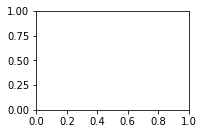

In [38]:
# En esta parte comprobamos la implementación de los programas. 
# Esta celda no debe ser modificada
import matplotlib.pyplot as plt
plt.figure()
cnt = 0

popsize = 100
n_gen = 20

#  EA para 2 instancias de tamaño n=10
filename_base = '../Instances/BIPART/Cebe.bip.n10.'
for i in range(2):
  cnt = cnt+1
  plt.subplot(2,2,cnt)
  fname  = filename_base+str(i+1)
  evals,best_sol = BipEA(fname,popsize,n_gen)  
  plt.plot(evals)
  print(10,i+1,evals,best_sol)  
    
#  EA para 2 instancias de tamaño n=50
filename_base = '../Instances/BIPART/Cebe.bip.n50.'
for i in range(2):
  cnt = cnt+1
  plt.subplot(2,2,cnt)
  fname  = filename_base+str(i+1)
  evals,best_sol = BipEA(fname,popsize,n_gen)  
  plt.plot(evals)
  print(50,i+1,evals,best_sol)  
